___
#### 0401

## Overview
- groupby로 그룹을 생성
- 그룹 : 범주형(categorical) 데이터를 이용 ; 연속형 변수 : 양자화해서 사용
- agg/ transform / apply 메소드로 그룹 연산
- 연속형 변수를 양자화
- pd.pivot_table 함수 : pivot + groupby
- pd.crosstab 
- 실습 : 주가 데이터, 대통령 후보 기부 데이터

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [45]:
path = 'C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch08/tips.csv'

tips = pd.read_csv(path)

### groupby, transform

In [28]:
# DataFrame 연습
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.204708,1.393406
1,a,two,0.478943,0.092908
2,b,one,-0.519439,0.281746
3,b,two,-0.555730,0.769023
4,a,one,1.965781,1.246435


In [30]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.746672,0.910916
b,-0.537585,0.525384


In [31]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [34]:
keys = ['one', 'two', 'one', 'two', 'one']
people.groupby(keys).mean()

,a,b,c,d,e
one,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309
two,0.505275,-0.849512,0.075965,0.834983,0.452620


- 각 그룹에서 평균값을 빼고 싶으면?

In [35]:
def demean(arr):
    return arr - arr.mean()

# 평균을 0으로 돌려놓고 분산을 만들어주기 위해

In [37]:
demeaned = people.groupby(keys).transform(demean)
demeaned

,a,b,c,d,e
Joe,1.089221,-0.232534,1.322612,1.113271,1.381226
Steve,0.381154,-1.152125,-0.447807,0.834043,-0.891190
Wes,-0.457709,NaN,NaN,-0.136869,-0.548778
Jim,-0.381154,1.152125,0.447807,-0.834043,0.891190
Travis,-0.631512,0.232534,-1.322612,-0.976402,-0.832448


- demeaned 객체 그룹의 평균은 0이 되어야 한다.

In [38]:
demeaned.groupby(keys).mean()

,a,b,c,d,e
one,0.000000e+00,-1.110223e-16,0.0,7.401487e-17,0.0
two,-2.775558e-17,0.000000e+00,0.0,0.000000e+00,0.0


### apply 함수 적용
- 행을 선택하기위해 사용할 때. 여기서 aggregate나 transform을 사용하기 제한된다.
- 변환을 적용할 데이터는 1개만 가능?

In [39]:
def top(df, n=5, column = ''):
    return df.sort_values(by=column)[-n:]

- groupby 객체에 describe 함수를 호출하면 내부적으로 다음과 같은 단계를 거친다  
f = lambda x: x.describe();grouped.apply(f)

In [40]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [41]:
result = tips.groupby('smoker')['tip_pct'].agg(['count', 'mean', 'std', 'min', 'max'])
result

,count,mean,std,min,max
smoker,,,,,
No,151,0.159328,0.039910,0.056797,0.291990
Yes,93,0.163196,0.085119,0.035638,0.710345


- 내부적으로 count,mean 등의 함수가 agg 함수에 전달되었음
- agg에 전달한 여러 함수들은 내포된 열 색인을 생성함.
- 따라서 열 이름이 생성된 것으로 이해하자.

### 양자화
- cut(등구간), qcut(등순위)
- 등구간을 지정하지 않으려면 edge point를 주면 됨.

In [ ]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Filling missing values wiht group-specific values(결측치 관리)
- fillna 함수로 group 안의 결측치 대체

In [4]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.478943
2         NaN
3   -0.555730
4         NaN
5    1.393406
dtype: float64

In [5]:
s.fillna(s.mean())

0    0.438873
1    0.478943
2    0.438873
3   -0.555730
4    0.438873
5    1.393406
dtype: float64

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

In [11]:
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          3.248944
New York     -1.021228
Vermont            NaN
Florida       0.124121
Oregon        0.302614
Nevada             NaN
California    0.000940
Idaho              NaN
dtype: float64

In [8]:
data.groupby(group_key).mean()

East    0.622501
West    0.564642
dtype: float64

In [9]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          1.352917
New York      0.886429
Vermont       0.622501
Florida      -0.371843
Oregon        1.669025
Nevada        0.564642
California   -0.539741
Idaho         0.564642
dtype: float64

- apply 함수가 아닌 transform 함수를 적용해도 동일하다.
- 위의 경우, fillna 함수 자체가 filtering 기능을 가지므로 transform이 더 적절하다. why?

In [10]:
fill_values = {'East': 0.5, 'West': -1} # 그룹에 따라 채워넣을 값을 미리 정함.
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio          1.352917
New York      0.886429
Vermont       0.500000
Florida      -0.371843
Oregon        1.669025
Nevada       -1.000000
California   -0.539741
Idaho        -1.000000
dtype: float64

### Example: Random sampling and permutation (랜덤표본과 순열)
- 머신러닝 모델을 돌리기 위한 data의 train과 test를 나누기 위해 사용함.
- permutation : 순열

In [21]:
# 트럼프 카드 만들기

# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']

# values
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']

# index
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)

In [22]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

- random sampling

In [32]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n]) # take : fancy indexing
draw(deck)

3S    3
6C    6
4S    4
7S    7
8S    8
dtype: int64

- 각 무늬별로 apply를 사용해서 2장의 카드를 뽑자

In [33]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2) # groupby에 함수를 넣어주면, 함수의 인자는 default : Series의 index.

C  QC    10
   4C     4
D  QD    10
   9D     9
H  JH    10
   9H     9
S  3S     3
   JS    10
dtype: int64

- group key의 색인을 제거하려면 group_keys=False

In [34]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

JC     10
4C      4
JD     10
4D      4
10H    10
KH     10
7S      7
9S      9
dtype: int64

### Example: Group weighted average and correlation
- 비율에 대한 평균을 구할 때는 가중평균을 구해야 한다.

In [40]:
np.random.seed(12345)
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': abs(np.random.randn(8)),
                'weights': abs(np.random.rand(8))})
df

,category,data,weights
0,a,0.204708,0.748907
1,a,0.478943,0.653570
2,a,0.519439,0.747715
3,a,0.555730,0.961307
4,b,1.965781,0.008388
5,b,1.393406,0.106444
6,b,0.092908,0.298704
7,b,0.281746,0.656411


In [36]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights']) # weight를 준 평균을 구하기 가능.
grouped.apply(get_wavg)

category
a   -0.348325
b    0.369663
dtype: float64

In [41]:
close_px = pd.read_csv('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


- df.corrwith() : 상관계수 확인
- df.pct_change() : 이전값과의 변화율 확인
    - (현재 - 과거 / 과거)

In [42]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [43]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [ ]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

## Pivot tables and Cross-tabulation(피벗테이블과 교차)
- value가 없다면 모든 연속된 데이터로 value가 설정됨.
- index : groupby key

In [46]:
tips.pivot_table(index=['sex', 'smoker']) 

size       tip  total_bill
sex    smoker                                
Female No      2.592593  2.773519   18.105185
       Yes     2.242424  2.931515   17.977879
Male   No      2.711340  3.113402   19.791237
       Yes     2.500000  3.051167   22.284500

- 위 결과는 groupby aggregation과 동일. 즉, pivot_table = grouby + aggregation
- == tips.groupby(['sex', 'smoker']).mean()

In [48]:
tips.pivot_table(['size'], index=['sex', 'day'],
                 columns='smoker')

size          
smoker             No       Yes
sex    day                     
Female Fri   2.500000  2.000000
       Sat   2.307692  2.200000
       Sun   3.071429  2.500000
       Thur  2.480000  2.428571
Male   Fri   2.000000  2.125000
       Sat   2.656250  2.629630
       Sun   2.883721  2.600000
       Thur  2.500000  2.300000

- 위 결과 또한 아래와 같음.

In [58]:
tips.groupby(['sex', 'day', 'smoker'])['size'].mean().unstack()

smoker             No       Yes
sex    day                     
Female Fri   2.500000  2.000000
       Sat   2.307692  2.200000
       Sun   3.071429  2.500000
       Thur  2.480000  2.428571
Male   Fri   2.000000  2.125000
       Sat   2.656250  2.629630
       Sun   2.883721  2.600000
       Thur  2.500000  2.300000

In [59]:
tips.pivot_table(['size'], index=['sex', 'day'],
                 columns='smoker', margins=True)

size                    
smoker             No       Yes       All
sex    day                               
Female Fri   2.500000  2.000000  2.111111
       Sat   2.307692  2.200000  2.250000
       Sun   3.071429  2.500000  2.944444
       Thur  2.480000  2.428571  2.468750
Male   Fri   2.000000  2.125000  2.100000
       Sat   2.656250  2.629630  2.644068
       Sun   2.883721  2.600000  2.810345
       Thur  2.500000  2.300000  2.433333
All          2.668874  2.408602  2.569672

- pivot_table은 margins = True를 통해 부분합을 해줄 수 있음.

In [60]:
# aggfunc = len. 전체 건 수 확인
tips.pivot_table('total_bill', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [62]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### Cross-tabulations: crosstab(교차 일람표)
- pd.crosstab()을 보고 이해 가능한 정도만.
- 빈도 수 계산할 때 용이.

In [64]:
from io import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead.
  del sys.path[0]


In [65]:
data

,Sample,Gender,Handedness
0,1,Female,Right-handed
1,2,Male,Left-handed
2,3,Female,Right-handed
3,4,Male,Right-handed
4,5,Male,Left-handed
5,6,Male,Right-handed
6,7,Female,Right-handed
7,8,Female,Left-handed
8,9,Male,Right-handed
9,10,Female,Right-handed


In [66]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,1,4,5
Male,2,3,5
All,3,7,10


In [68]:
# tips 데이터 이용한 crosstab
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

___
## 실습예제 : 2012 Federal Election Commission Database (선거 데이터)

In [69]:
fec = pd.read_csv('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch09/P00000001-ALL.csv')

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [71]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [72]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [74]:
unique_cands[2]

'Obama, Barack'

In [73]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [75]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [76]:
fec.cand_nm[123456:123461].map(parties) # 정당 확인

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [80]:
# Add it as a column(새로운 칼럼 추가)
fec['party'] = fec.cand_nm.map(parties)

In [78]:
fec['party'].value_counts() 

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [81]:
# 기부금과 환급금(기부금액이 마이너스인 경우) 구분
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [82]:
fec = fec[fec.contb_receipt_amt > 0]

In [84]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
416,C00431171,P80003353,"Romney, Mitt","WILSON, ANDREW C. MR.",DPO,AE,9.87e+07,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50.0,17-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
417,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128e+07,US ARMY,MILITARY OFFICER,250.0,20-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
418,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,09-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
419,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128e+07,US ARMY,MILITARY OFFICER,250.0,28-JAN-12,NaN,NaN,NaN,SA17A,771933,Republican
420,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE MR.",APO,AE,9.128e+07,US ARMY,ENGINEER,50.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican


### Donation statistics by occupation and employer

In [85]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [86]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [87]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [91]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [89]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


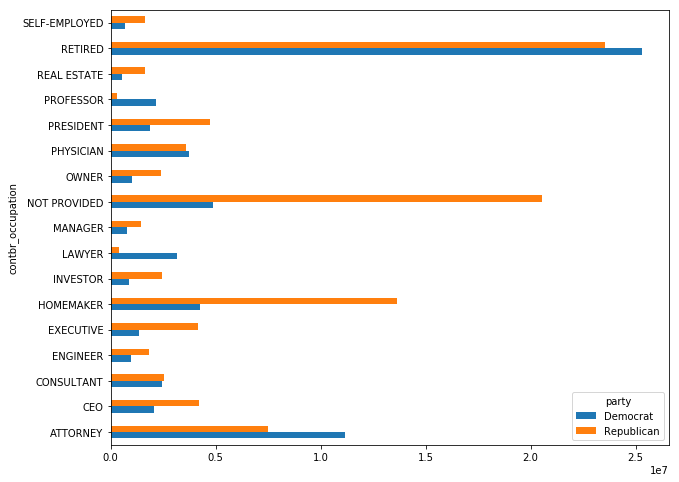

In [92]:
over_2mm.plot(kind='barh', figsize=(10,8))

In [96]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    return totals.sort_values(ascending=False)[-n:]

- 어떤 직군과 고용유형이 각각 누구에게 더 많이 기부했는지 알아보기 위함.
- groupby된 데이터에서 한 번 더 groupby를 해주는 모습.

In [97]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  COMPUTER ASSISTANT                        3.0
               SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
               LEAD UI/UX DEVELOPER                      3.0
               POLICY/ LAWYER                            3.0
               LAN/WAN ANALYST                           3.0
               SR MGR                                    3.0
Romney, Mitt   MD - UROLOGIST                            5.0
               DISTRICT REPRESENTATIVE                   5.0
               INDEPENDENT PROFESSIONAL                  3.0
               REMODELER & SEMI RETIRED                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               IFC CONTRACTING SOLUTIONS                 3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

In [99]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                   
Obama, Barack  SOLIYA                                3.0
               CARR ENTERPRISES                      3.0
               PENN STATE DICKINSON SCHOOL OF LAW    3.0
               CADUCEUS OCCUPATIONAL MEDICINE        3.0
               N.A.                                  3.0
               REAL ENERGY CONSULTING SERVICES       3.0
               JPDSYSTEMS, LLC                       3.0
               CASS REGIONAL MED. CENTER             2.5
               ARCON CORP                            2.0
               THE VICTORIA GROUP, INC.              2.0
Romney, Mitt   EASTHAM CAPITAL                       5.0
               GREGORY GALLIVAN                      5.0
               DIRECT LENDERS LLC                    5.0
               LOUGH INVESTMENT ADVISORY LLC         4.0
               WATERWORKS INDUSRTIES                 3.0
               WILL MERRIFIELD                       3.0
               HONOLD COMMUNICTAIONS  

In [ ]:
# pivot_table로 한 번에 적용 가능함.
# 혼자 해볼 것.